In [68]:
import numpy as np
import pandas as pd
%matplotlib inline 
import re
import matplotlib
import matplotlib.pyplot as plt

orders = pd.read_csv('Orders.csv')
returns = pd.read_csv('Returns.csv')



FileNotFoundError: [Errno 2] No such file or directory: 'Orders.csv'

In [50]:
pd.set_option('display.max_columns', 999)

In [51]:
orders

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.770,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.630,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.490,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.160,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.040,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,6/19/15,6/19/15,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,Hiroshima,Japan,Eastern Asia,Asia Pacific,OFF-FA-3072,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.10,5,0.0,4.50,1.010,Medium
51286,34337,US-2014-ZD21925140-41765,5/6/14,5/10/14,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,Tennessee,United States,Southern US,USCA,FUR-FU-4070,Furniture,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",16.72,5,0.2,3.34,1.930,High
51287,31315,CA-2012-ZD21925140-41147,8/26/12,8/31/12,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,California,United States,Western US,USCA,OFF-AR-5321,Office Supplies,Art,Newell 341,8.56,2,0.0,2.48,1.580,High
51288,9596,MX-2013-RB1979518-41322,2/17/13,2/21/13,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,São Paulo,Brazil,South America,LATAM,OFF-BI-2919,Office Supplies,Binders,"Acco Index Tab, Economy",13.44,2,0.0,2.40,1.003,Medium


In [21]:
returns.columns

Index(['Returned', 'Order ID', 'Region'], dtype='object')

In [22]:
returns

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania
...,...,...,...
1074,Yes,IN-2014-DA1345058-41769,Southern Asia
1075,Yes,US-2013-HG14845140-41530,Eastern US
1076,Yes,US-2013-SJ2021582-41543,Central America
1077,Yes,CA-2015-EB13870140-42269,Eastern US


In [23]:
orders['Order.ID']

0        CA-2014-AB10015140-41954
1          IN-2014-JR162107-41675
2          IN-2014-CR127307-41929
3         ES-2014-KM1637548-41667
4         SG-2014-RH9495111-41948
                   ...           
51285     IN-2015-KE1642066-42174
51286    US-2014-ZD21925140-41765
51287    CA-2012-ZD21925140-41147
51288     MX-2013-RB1979518-41322
51289     MX-2013-MC1810093-41416
Name: Order.ID, Length: 51290, dtype: object

In [71]:
'''
Converting "Profit" & "Sales" columns into a numeric type.
First, we need to remove the '$' and ',' signs so that we do not have any interpretation problems.

+

Converting "Order.Date" and "Ship.Date" column into a datetime object using pandas.


'''

columns = ['Profit', 'Sales', 'Order.Date', 'Ship.Date']
def to_num(columns):
    
    for col in columns:  
        if 'Date' not in col:
            orders[col] = orders[col].str.replace('$', '').str.replace(',', '').astype(float)
        else:
            orders[col] =  pd.to_datetime(orders[col])

to_num(columns)    

C:\Users\rauna\AppData\Local\Temp/ipykernel_23936/1449452223.py:17: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  orders[col] = orders[col].str.replace('$', '').str.replace(',', '').astype(float)


In [72]:
pd.to_numeric(orders['Profit'],errors='coerce')


0         62.15
1       -288.77
2        919.97
3        -96.54
4        311.52
          ...  
51285      4.50
51286      3.34
51287      2.48
51288      2.40
51289      1.80
Name: Profit, Length: 51290, dtype: float64

In [73]:
pd.to_numeric(orders['Sales'],errors='coerce')


0         221.98
1        3709.40
2        5175.17
3        2892.51
4        2832.96
          ...   
51285      65.10
51286      16.72
51287       8.56
51288      13.44
51289      61.38
Name: Sales, Length: 51290, dtype: float64

In [30]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

neworders = orders.select_dtypes(include = numerics)

In [74]:
neworders.columns

Index(['Row.ID', 'Postal.Code', 'Quantity', 'Discount', 'Shipping.Cost'], dtype='object')

In [75]:
orders["Sales"]

0         221.98
1        3709.40
2        5175.17
3        2892.51
4        2832.96
          ...   
51285      65.10
51286      16.72
51287       8.56
51288      13.44
51289      61.38
Name: Sales, Length: 51290, dtype: float64

In [76]:
orders.corr()

,Row.ID,Postal.Code,Sales,Quantity,Discount,Profit,Shipping.Cost
Row.ID,1.000000,0.009671,-0.043889,-0.173483,0.087594,-0.019037,-0.038431
Postal.Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961,-0.025491
Sales,-0.043889,-0.023854,1.000000,0.313577,-0.086722,0.484918,0.767835
Quantity,-0.173483,0.012761,0.313577,1.000000,-0.019875,0.104365,0.271804
Discount,0.087594,0.058443,-0.086722,-0.019875,1.000000,-0.316491,-0.078153
Profit,-0.019037,-0.029961,0.484918,0.104365,-0.316491,1.000000,0.354423
Shipping.Cost,-0.038431,-0.025491,0.767835,0.271804,-0.078153,0.354423,1.000000


In [77]:
orders.drop(columns = ['Postal.Code','Row.ID'])

,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,City,State,Country,Region,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.770,High
1,IN-2014-JR162107-41675,2014-05-02,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.630,Critical
2,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.490,Medium
3,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.160,Medium
4,SG-2014-RH9495111-41948,2014-05-11,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.040,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,IN-2015-KE1642066-42174,2015-06-19,2015-06-19,Same Day,KE-1642066,Katrina Edelman,Corporate,Kure,Hiroshima,Japan,Eastern Asia,Asia Pacific,OFF-FA-3072,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.10,5,0.0,4.50,1.010,Medium
51286,US-2014-ZD21925140-41765,2014-06-05,2014-05-10,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,Chattanooga,Tennessee,United States,Southern US,USCA,FUR-FU-4070,Furniture,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",16.72,5,0.2,3.34,1.930,High
51287,CA-2012-ZD21925140-41147,2012-08-26,2012-08-31,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,San Francisco,California,United States,Western US,USCA,OFF-AR-5321,Office Supplies,Art,Newell 341,8.56,2,0.0,2.48,1.580,High
51288,MX-2013-RB1979518-41322,2013-02-17,2013-02-21,Standard Class,RB-1979518,Ross Baird,Home Office,Valinhos,São Paulo,Brazil,South America,LATAM,OFF-BI-2919,Office Supplies,Binders,"Acco Index Tab, Economy",13.44,2,0.0,2.40,1.003,Medium


In [78]:
orders['Order.Date']=orders['Order.Date'].apply(pd.to_datetime)


In [121]:
orders.columns = orders.columns.str.replace('.', '_')
orders.columns
returns.columns = returns.columns.str.replace(' ', '_')
returns.columns

C:\Users\rauna\AppData\Local\Temp/ipykernel_23936/2427187156.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  orders.columns = orders.columns.str.replace('.', '_')


Index(['Returned', 'Order_ID', 'Region'], dtype='object')

In [81]:
orders.Order_Date = pd.to_datetime(orders.Order_Date)

In [82]:
orders.index = orders.Order_Date
orders.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Postal_Code,City,State,Country,Region,Market,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority
Order_Date,,,,,,,,,,,,,,,,,,,,,,,,
2014-11-11,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
2014-05-02,26341,IN-2014-JR162107-41675,2014-05-02,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2014-10-17,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
2014-01-28,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
2014-05-11,47221,SG-2014-RH9495111-41948,2014-05-11,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


In [106]:
%matplotlib inline

orders_date = orders[['Quantity']]
orders_date.head()

,Quantity
Order_Date,
2014-11-11,2
2014-05-02,9
2014-10-17,9
2014-01-28,5
2014-05-11,8


<AxesSubplot:xlabel='Order_Date'>

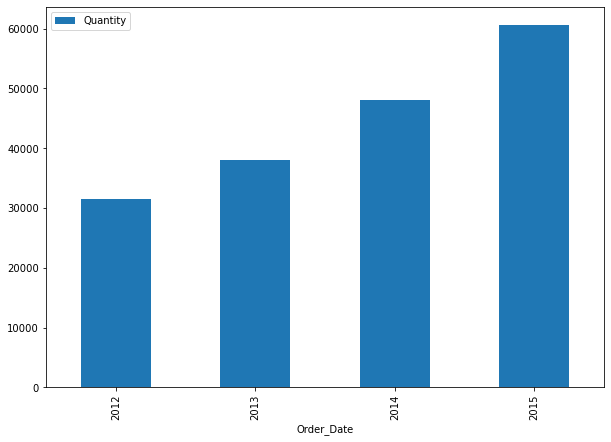

In [126]:
plt.rcParams['figure.figsize'] = 10, 7
orders_date.groupby(orders_date.index.year).sum().plot(kind='bar')

In [103]:
cat = orders[['Quantity', 'Category']]
cat1 = orders[['Sales', 'Category']]

cat.head()

,Quantity,Category
Order_Date,,
2014-11-11,2,Technology
2014-05-02,9,Furniture
2014-10-17,9,Technology
2014-01-28,5,Technology
2014-05-11,8,Technology


In [105]:
cat1.groupby([cat.index.month, 'Category']).sum().unstack(fill_value=0)

Sales                           
Category    Furniture Office Supplies Technology
Order_Date                                      
1           258512.28       250475.16  273950.53
2           250246.41       202097.38  264737.39
3           301670.90       287860.00  351625.66
4           266803.25       258659.60  314303.05
5           321159.08       314048.93  364314.84
6           372331.13       332559.58  447848.54
7           259644.99       280236.87  326914.39
8           389039.88       365600.98  472616.37
9           412476.24       353805.28  460694.03
10          355702.59       317195.29  454217.93
11          474200.67       410364.55  513835.22
12          448665.61       414591.84  499500.81

In [109]:
orders['Sales'].dtype

dtype('float64')

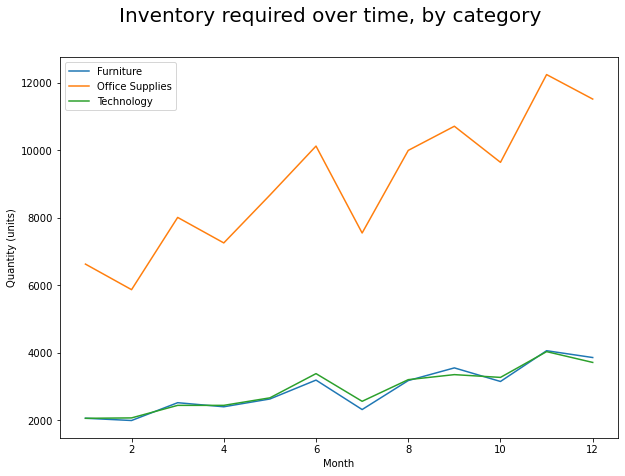

In [127]:
cat.groupby([cat.index.month, 'Category']).sum().unstack(fill_value=0).plot()
plt.xlabel('Month')
plt.ylabel('Quantity (units)')
plt.suptitle('Inventory required over time, by category', fontsize=20)
L=plt.legend()
L.get_texts()[0].set_text('Furniture')
L.get_texts()[1].set_text('Office Supplies')
L.get_texts()[2].set_text('Technology')

In [124]:
merged = orders.merge(returns, how = 'left', on = 'Order_ID')

In [125]:
merged

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Postal_Code,City,State,Country,Region_x,Market,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Returned,Region_y
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.770,High,NaN,NaN
1,26341,IN-2014-JR162107-41675,2014-05-02,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.630,Critical,NaN,NaN
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.490,Medium,NaN,NaN
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.160,Medium,NaN,NaN
4,47221,SG-2014-RH9495111-41948,2014-05-11,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.040,Critical,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,2015-06-19,2015-06-19,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,Hiroshima,Japan,Eastern Asia,Asia Pacific,OFF-FA-3072,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.10,5,0.0,4.50,1.010,Medium,NaN,NaN
51286,34337,US-2014-ZD21925140-41765,2014-06-05,2014-05-10,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,Tennessee,United States,Southern US,USCA,FUR-FU-4070,Furniture,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",16.72,5,0.2,3.34,1.930,High,NaN,NaN
51287,31315,CA-2012-ZD21925140-41147,2012-08-26,2012-08-31,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,California,United States,Western US,USCA,OFF-AR-5321,Office Supplies,Art,Newell 341,8.56,2,0.0,2.48,1.580,High,NaN,NaN
51288,9596,MX-2013-RB1979518-41322,2013-02-17,2013-02-21,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,São Paulo,Brazil,South America,LATAM,OFF-BI-2919,Office Supplies,Binders,"Acco Index Tab, Economy",13.44,2,0.0,2.40,1.003,Medium,NaN,NaN


In [128]:
merged.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Postal_Code', 'City',
       'State', 'Country', 'Region_x', 'Market', 'Product_ID', 'Category',
       'Sub_Category', 'Product_Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping_Cost', 'Order_Priority', 'Returned', 'Region_y'],
      dtype='object')

In [129]:
merged.Returned = merged.Returned.replace(np.nan, 'No')
merged.Returned.unique()

array(['No', 'Yes'], dtype=object)

In [130]:
merged.index = merged.Order_Date

In [131]:
##Profit lost due to returns by year
merged.groupby([merged.index.year, 'Returned'])[['Profit']].sum()

Profit
Order_Date Returned           
2012       No        231463.09
           Yes        17477.26
2013       No        298145.44
           Yes         9269.89
2014       No        389424.26
           Yes        17510.63
2015       No        487053.13
           Yes        17112.97

In [139]:
returnees = merged.loc[(merged.Returned == 'Yes')].groupby('Customer_ID').size()

In [146]:
# X = people who returned more than once and Y = people who returned more than 5 times
x = (returnees[returnees > 1].size)
y = (returnees[returnees > 5].size)

In [147]:
x

547

In [148]:
y

46

In [149]:
merged

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Postal_Code,City,State,Country,Region_x,Market,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Returned,Region_y
Order_Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-11-11,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.770,High,No,NaN
2014-05-02,26341,IN-2014-JR162107-41675,2014-05-02,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.630,Critical,No,NaN
2014-10-17,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.490,Medium,No,NaN
2014-01-28,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.160,Medium,No,NaN
2014-05-11,47221,SG-2014-RH9495111-41948,2014-05-11,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.040,Critical,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-19,29002,IN-2015-KE1642066-42174,2015-06-19,2015-06-19,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,Hiroshima,Japan,Eastern Asia,Asia Pacific,OFF-FA-3072,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.10,5,0.0,4.50,1.010,Medium,No,NaN
2014-06-05,34337,US-2014-ZD21925140-41765,2014-06-05,2014-05-10,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,Tennessee,United States,Southern US,USCA,FUR-FU-4070,Furniture,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",16.72,5,0.2,3.34,1.930,High,No,NaN
2012-08-26,31315,CA-2012-ZD21925140-41147,2012-08-26,2012-08-31,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,California,United States,Western US,USCA,OFF-AR-5321,Office Supplies,Art,Newell 341,8.56,2,0.0,2.48,1.580,High,No,NaN


In [168]:
#regions more likely to return

returnregion = merged[['Region_x', 'Returned', 'Order_ID']].groupby(['Region_x', 'Returned']).count()
returnregion = returnregion.reset_index(level=["Returned"])
total = returnregion.groupby('Region_x').sum()

total = returnregion.groupby('Region_x').sum()
final = returnregion.merge(total, how='left', on='Region_x')
final = final.loc[final.Returned == 'Yes']
final.columns = ['Returned', 'Orders_Returned', 'Total_Orders']
final.index.names = ['Region']
final["Pct_Returned"] = final.Orders_Returned / final.Total_Orders * 100





In [177]:
final

,Returned,Orders_Returned,Total_Orders,Pct_Returned
Region,,,,
Canada,Yes,15,384,3.906250
Caribbean,Yes,69,1690,4.082840
Central Africa,Yes,17,643,2.643857
Central America,Yes,248,5616,4.415954
Central Asia,Yes,9,217,4.147465
Central US,Yes,74,2323,3.185536
Eastern Africa,Yes,18,728,2.472527
Eastern Asia,Yes,131,2374,5.518113
Eastern Europe,Yes,42,1529,2.746893


In [164]:
total

,Order_ID
Region_x,
Canada,384
Caribbean,1690
Central Africa,643
Central America,5616
Central Asia,217
Central US,2323
Eastern Africa,728
Eastern Asia,2374
Eastern Europe,1529


In [174]:
final

,Returned,Orders_Returned,Total_Orders,Pct_Returned
Region,,,,
Canada,Yes,15,384,3.906250
Caribbean,Yes,69,1690,4.082840
Central Africa,Yes,17,643,2.643857
Central America,Yes,248,5616,4.415954
Central Asia,Yes,9,217,4.147465
Central US,Yes,74,2323,3.185536
Eastern Africa,Yes,18,728,2.472527
Eastern Asia,Yes,131,2374,5.518113
Eastern Europe,Yes,42,1529,2.746893


In [180]:
returns.rename(columns={'Order ID':'Order_ID'}, inplace=True)
detReturned = pd.merge(orders, returns[["Order_ID"]], on = "Order_ID")
detReturned = detReturned.set_index("Order_Date")

In [183]:
(detReturned.groupby("Sub_Category").size() / orders.groupby("Sub_Category").size()).sort_values()

Sub_Category
Appliances     0.033869
Fasteners      0.039216
Envelopes      0.041475
Storage        0.041989
Machines       0.042396
Supplies       0.042792
Furnishings    0.042803
Chairs         0.042807
Paper          0.042955
Bookcases      0.043136
Phones         0.043193
Binders        0.043768
Copiers        0.044534
Art            0.044613
Accessories    0.044878
Tables         0.047619
Labels         0.052672
dtype: float64

In [184]:
## PART II


In [185]:
merged[["Order_ID","Returned"]].groupby("Returned").count()

,Order_ID
Returned,
No,49070
Yes,2220


In [191]:
merged.Ship_Date = pd.to_datetime(merged.Ship_Date,dayfirst= False)
merged['Process_Time'] = merged.Ship_Date - merged.Order_Date
merged['Process_Time'] = merged.Process_Time.apply(lambda d: d.days)
merged

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Postal_Code,City,State,Country,Region_x,Market,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Returned,Region_y,Process_Time
Order_Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-11-11,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.770,High,No,NaN,2
2014-05-02,26341,IN-2014-JR162107-41675,2014-05-02,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.630,Critical,No,NaN,-84
2014-10-17,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.490,Medium,No,NaN,1
2014-01-28,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.160,Medium,No,NaN,2
2014-05-11,47221,SG-2014-RH9495111-41948,2014-05-11,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.040,Critical,No,NaN,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-19,29002,IN-2015-KE1642066-42174,2015-06-19,2015-06-19,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,Hiroshima,Japan,Eastern Asia,Asia Pacific,OFF-FA-3072,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.10,5,0.0,4.50,1.010,Medium,No,NaN,0
2014-06-05,34337,US-2014-ZD21925140-41765,2014-06-05,2014-05-10,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,Tennessee,United States,Southern US,USCA,FUR-FU-4070,Furniture,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",16.72,5,0.2,3.34,1.930,High,No,NaN,-26
2012-08-26,31315,CA-2012-ZD21925140-41147,2012-08-26,2012-08-31,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,California,United States,Western US,USCA,OFF-AR-5321,Office Supplies,Art,Newell 341,8.56,2,0.0,2.48,1.580,High,No,NaN,5
